# Classification 

_Reference:_
[Julia Programming For Data Science & Machine Learning: Julia | Udemy](https://www.udemy.com/course/julialang/)

## Logistic Regression

### Case 1

Map a relationship between camera_mp and price, and classify them as 1 or 0 for camera_mp

In [1]:
using CSV, DataFrames, Plots, GLM

In [2]:
df = CSV.read("data/camera.csv", DataFrame)

Row,price,camera_mp
,Int64,Int64
1,890,1
2,620,1
3,730,1
4,480,1
5,1060,1
6,450,1
7,540,1
8,500,1
9,890,1


In [3]:
names(df)

2-element Vector{String}:
 "price"
 "camera_mp"

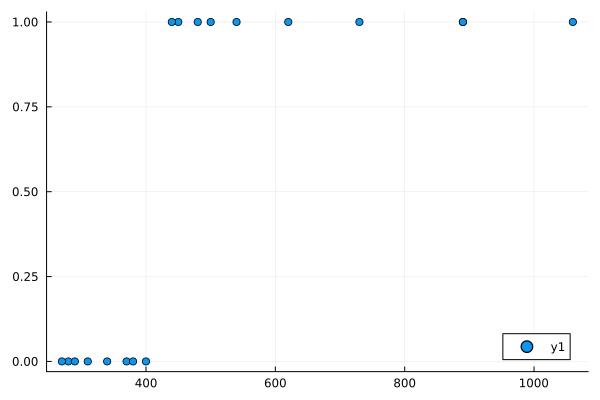

In [4]:
scatter(df.price, df.camera_mp)

In [5]:
model = glm(@formula(camera_mp ~ price), df, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

camera_mp ~ 1 + price

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -349.418     36976.7     -0.01    0.9925  -72822.5    72123.7
price           0.831995     88.0227   0.01    0.9925    -171.689    173.353
────────────────────────────────────────────────────────────────────────────

In [6]:
predict(model, DataFrame(price=[390, 400, 410, 420, 430, 440, 990, 882, 750]))

9-element Vector{Union{Missing, Float64}}:
 1.4747798971506998e-11
 6.053923997767052e-8
 0.00024844991845192246
 0.5049829480810379
 0.9997612573735242
 0.9999999418266791
 1.0
 1.0
 1.0

Taking the output, we take < 0.5 as class 0, and > 0.5 as class 1